In [1]:
import pandas as pd

In [2]:
tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')

In [3]:
movie_critic = pd.read_csv('rotten_tomatoes_critic_reviews.csv.gz')
movie_critic

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [4]:
#drop NA values 
movie_critic = movie_critic.dropna()
movie_critic

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...,...,...,...,...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [5]:
#dropped all unnecessary data and now sorting to see more information about the review date. 

In [6]:
sorted_movie_critic = movie_critic.sort_values(['review_date'], ascending=False)
sorted_movie_critic =sorted_movie_critic.dropna()

sorted_movie_critic

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
1116640,m/working_girl,Nicholas Bell,False,IONCINEMA.com,Fresh,4/5,2020-10-29,"A buoyant, emotionally gratifying underdog sto..."
1078687,m/vernon_florida,Jordan M. Smith,False,IONCINEMA.com,Fresh,4/5,2020-10-28,"Vernon, Florida feels more like an endearingly..."
1078144,m/venom_2018,David Hogan,False,hoganreviews.co.uk,Fresh,3/5,2020-10-28,Has some fun set-pieces and worked around the ...
1077715,m/velvet_buzzsaw,Yago García,False,Cinemanía (Spain),Fresh,3.5/5,2020-10-28,[Velvet Buzzsaw] metamorphoses into one of tho...
1120068,m/x_the_man_with_the_x_ray_eyes,Matt Brunson,False,Film Frenzy,Fresh,3/4,2020-10-28,This nifty slice of sci-fi basically plays lik...
...,...,...,...,...,...,...,...,...
10925,m/10010335-rab_ne_bana_di_jodi,Raam Tarat,False,Future Movies UK,Fresh,4/5,1800-01-01,"It's well put together, colourful, typifies In..."
1044018,m/to_catch_a_thief,Bob Westal,False,Bullz-Eye.com,Fresh,3/5,1800-01-01,"This enjoyable mixture of wit, low voltage int..."
1083882,m/wah-do-dem,Wesley Morris,True,Boston Globe,Rotten,1/4,1800-01-01,"""Wah do dem'' is Jamaican patois for ""What's w..."
1083880,m/wah-do-dem,V.A. Musetto,True,New York Post,Fresh,2.5/4,1800-01-01,Slight but satisfying.


In [7]:
movie_critic.value_counts('review_date').head(10)

review_date
2000-01-01    22100
2003-05-20     1027
2004-10-23      792
2018-11-01      764
2005-12-06      761
2018-10-31      710
2008-10-18      699
2002-07-26      650
2018-11-02      610
2010-07-06      570
dtype: int64

In [8]:
rt_movies = pd.read_csv('rotten_tomatoes_movies.csv.gz')

In [9]:
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')

In [10]:
movie_gross =  pd.read_csv('bom.movie_gross.csv.gz')

In [11]:
title_basics = pd.read_csv('imdb.title.basics.csv.gz')

In [12]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
title_basics = title_basics.dropna()
title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [14]:
title_basics.value_counts('genres')

genres
Documentary                   24672
Drama                         15725
Comedy                         6413
Comedy,Drama                   3163
Horror                         2975
                              ...  
Documentary,Fantasy,Sci-Fi        1
History,News,War                  1
Adventure,Animation,Crime         1
Drama,Mystery,Sport               1
Adventure,History,Music           1
Length: 1040, dtype: int64

In [15]:
title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [16]:
print(title_ratings.isnull().sum())

tconst           0
averagerating    0
numvotes         0
dtype: int64


In [17]:
frames = [title_ratings, title_basics]
ratings_basics = pd.merge(frames[0], frames[1], how = 'right',  on = ['tconst'])
ratings_basics

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77.0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43.0,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517.0,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,6.5,119.0,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,NaN,NaN,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...,...,...
112227,tt9916160,6.5,11.0,Drømmeland,Drømmeland,2019,72.0,Documentary
112228,tt9916170,NaN,NaN,The Rehearsal,O Ensaio,2019,51.0,Drama
112229,tt9916186,NaN,NaN,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
112230,tt9916190,NaN,NaN,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [18]:
ratings_basics = ratings_basics.drop(columns = 'original_title')

In [19]:
ratings_basics = ratings_basics.dropna()

In [20]:
#top_genres = ratings_basics['genres'].value_counts().head(10).index

In [21]:
#created a list of the top 10 genres we want to look into ^^^^

In [22]:
ratings_basics['numvotes'].describe()

count    6.572000e+04
mean     3.954674e+03
std      3.208823e+04
min      5.000000e+00
25%      1.600000e+01
50%      6.200000e+01
75%      3.520000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [23]:
#What is the difference between a short film and a movie?
#A short film is basically any film that is too short to be considered a feature film. ... The special effects, music, actors, and all other aspects of a movie are irrelevant; the only thing that is relevant to defining a film as a “short film” is simply its length.
ratings_basics['runtime_minutes'].describe()

count    65720.000000
mean        94.732273
std        209.377017
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [24]:
#ratings_basics.loc[ratings_basics['runtime_minutes'] >= 40]

In [25]:
#ratings_basics.loc[ratings_basics['numvotes'] >= 1500] 

In [26]:
#Data goes from 2010 to 2019
ratings_basics['start_year'].describe()

count    65720.000000
mean      2014.258065
std          2.600143
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2019.000000
Name: start_year, dtype: float64

In [27]:
movies_df = ratings_basics
movies_df


,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77.0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517.0,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,6.5,119.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0137204,8.1,263.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
...,...,...,...,...,...,...,...
112215,tt9911774,8.4,365.0,Padmavyuhathile Abhimanyu,2019,130.0,Drama
112216,tt9913056,6.2,5.0,Swarm Season,2019,86.0,Documentary
112217,tt9913084,6.2,6.0,Diabolik sono io,2019,75.0,Documentary
112221,tt9914286,8.7,136.0,Sokagin Çocuklari,2019,98.0,"Drama,Family"


In [28]:
#now filter out movies with low number of votes
#movies_df = movies_df.loc[ratings_basics['numvotes'] >= 10000]
#movies_df

In [29]:
import numpy as np

In [30]:
budg= pd.read_csv('tn.movie_budgets.csv.gz')
budg['production_budget']=budg['production_budget'].str.replace(',','')
budg['domestic_gross']=budg['domestic_gross'].str.replace(',','')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace(',','')
budg['production_budget']=budg['production_budget'].str.replace('$','').astype('int64')
budg['domestic_gross']=budg['domestic_gross'].str.replace('$','').astype('int64')
budg['worldwide_gross']=budg['worldwide_gross'].str.replace('$','').astype('int64')
#made sure the data was all integers in order for it to be able to sorted and analyzed
budg['net_pre_marketing']=budg['worldwide_gross']-budg['production_budget']
#made this column to indicate the best of my abilities the net profit
#it is unclear if advertising money is included(though i'm assuming it is not)
budg['domestic/world']=budg['domestic_gross']/budg['worldwide_gross']
#made this money to detirmine what percentage of worldwide earning were domestic
budg=budg.dropna()
budg['earnings/cost_ratio']=budg['net_pre_marketing']/budg['production_budget']
#this works as a percentage the movie recouperated its production budget
budg['year_released']=budg['release_date'].str[-4:].astype('int64')
#made a new column which
budg.drop(budg[budg['year_released'] < 2010].index, inplace = True)
budg.sort_values('worldwide_gross')
budg['Profitable?']= np.where(budg['earnings/cost_ratio']>= 1, True, False)
budget_df = budg.sort_values('earnings/cost_ratio')
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
5302,3,"Dec 11, 2015",American Hero,1000000,0,26,-999974,0.000000,-0.999974,2015,False
4081,82,"May 21, 2010",Perrierâs Bounty,6600000,828,828,-6599172,1.000000,-0.999875,2010,False
3818,19,"May 8, 2015",Skin Trade,9000000,1242,1242,-8998758,1.000000,-0.999862,2015,False
5335,36,"Nov 21, 2014",Food Chains,913000,0,176,-912824,0.000000,-0.999807,2014,False
3161,62,"Sep 1, 2015",Broken Horses,15000000,0,3471,-14996529,0.000000,-0.999769,2015,False
...,...,...,...,...,...,...,...,...,...,...,...
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,174512032,0.477449,58.170677,2010,True
5213,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,0.509439,63.364198,2015,True
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,0.540790,65.580591,2011,True
5211,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,0.523420,100.759490,2012,True


In [31]:
frames[0]

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [32]:
frames = [movies_df , budget_df]
mega_df = pd.merge(frames[0].rename(columns={'primary_title': 'movie'}), frames[1], how = 'left',  on = ['movie'])
mega_df

,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
0,tt0063540,7.0,77.0,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,7.2,43.0,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,6.9,4517.0,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0100275,6.5,119.0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0137204,8.1,263.0,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65720,tt9911774,8.4,365.0,Padmavyuhathile Abhimanyu,2019,130.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65721,tt9913056,6.2,5.0,Swarm Season,2019,86.0,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65722,tt9913084,6.2,6.0,Diabolik sono io,2019,75.0,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65723,tt9914286,8.7,136.0,Sokagin Çocuklari,2019,98.0,"Drama,Family",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
mega_table = mega_df.dropna()
mega_table

,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
14,tt0249516,1.9,8248.0,Foodfight!,2012,91.0,"Action,Animation,Comedy",26.0,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,-4.492629e+07,0.000000,-0.998362,2012.0,False
30,tt0337692,6.1,37886.0,On the Road,2012,124.0,"Adventure,Drama,Romance",17.0,"Mar 22, 2013",25000000.0,720828.0,9.313302e+06,-1.568670e+07,0.077398,-0.627468,2013.0,False
34,tt0359950,7.3,275300.0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37.0,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,9.686118e+07,0.309999,1.064409,2013.0,True
38,tt0365907,6.5,105116.0,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67.0,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,3.410859e+07,0.418906,1.218164,2014.0,True
39,tt0369610,7.0,539338.0,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09,0.395590,6.669092,2015.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64927,tt9225192,6.5,576.0,Unstoppable,2018,116.0,"Action,Crime",19.0,"Nov 12, 2010",95000000.0,81562942.0,1.657209e+08,7.072092e+07,0.492170,0.744431,2010.0,False
65188,tt9392532,7.6,18.0,Neighbors,2018,90.0,"Comedy,Drama",64.0,"May 9, 2014",18000000.0,150086800.0,2.709444e+08,2.529444e+08,0.553939,14.052468,2014.0,True
65242,tt9447594,6.1,10.0,The Gambler,2019,121.0,"Action,Sci-Fi,Thriller",25.0,"Dec 10, 2014",25000000.0,33680992.0,3.871803e+07,1.371803e+07,0.869905,0.548721,2014.0,False
65704,tt9899880,5.8,5.0,Columbus,2018,85.0,Comedy,93.0,"Aug 4, 2017",700000.0,1017107.0,1.110511e+06,4.105110e+05,0.915891,0.586444,2017.0,False


In [34]:
#cleaning mega table to drop unnecessary columns and change the index

In [35]:
mega_table.to_csv('Merge_mega_table2.csv')

In [36]:
mega_table.set_index('movie')

,tconst,averagerating,numvotes,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
movie,,,,,,,,,,,,,,,,
Foodfight!,tt0249516,1.9,8248.0,2012,91.0,"Action,Animation,Comedy",26.0,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,-4.492629e+07,0.000000,-0.998362,2012.0,False
On the Road,tt0337692,6.1,37886.0,2012,124.0,"Adventure,Drama,Romance",17.0,"Mar 22, 2013",25000000.0,720828.0,9.313302e+06,-1.568670e+07,0.077398,-0.627468,2013.0,False
The Secret Life of Walter Mitty,tt0359950,7.3,275300.0,2013,114.0,"Adventure,Comedy,Drama",37.0,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,9.686118e+07,0.309999,1.064409,2013.0,True
A Walk Among the Tombstones,tt0365907,6.5,105116.0,2014,114.0,"Action,Crime,Drama",67.0,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,3.410859e+07,0.418906,1.218164,2014.0,True
Jurassic World,tt0369610,7.0,539338.0,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09,0.395590,6.669092,2015.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unstoppable,tt9225192,6.5,576.0,2018,116.0,"Action,Crime",19.0,"Nov 12, 2010",95000000.0,81562942.0,1.657209e+08,7.072092e+07,0.492170,0.744431,2010.0,False
Neighbors,tt9392532,7.6,18.0,2018,90.0,"Comedy,Drama",64.0,"May 9, 2014",18000000.0,150086800.0,2.709444e+08,2.529444e+08,0.553939,14.052468,2014.0,True
The Gambler,tt9447594,6.1,10.0,2019,121.0,"Action,Sci-Fi,Thriller",25.0,"Dec 10, 2014",25000000.0,33680992.0,3.871803e+07,1.371803e+07,0.869905,0.548721,2014.0,False


In [37]:
# Visuals

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
top_20_genres = mega_table.value_counts('genres').head(20)
top_20_genres

genres
Drama                         131
Adventure,Animation,Comedy     69
Comedy,Drama                   65
Comedy                         63
Documentary                    62
Comedy,Drama,Romance           62
Action,Adventure,Sci-Fi        53
Drama,Romance                  52
Comedy,Romance                 47
Action,Crime,Drama             43
Action,Adventure,Fantasy       35
Horror,Mystery,Thriller        35
Action,Comedy,Crime            32
Horror,Thriller                31
Crime,Drama,Thriller           30
Drama,Thriller                 30
Action,Adventure,Drama         29
Horror                         28
Biography,Drama,History        26
Action,Crime,Thriller          24
dtype: int64

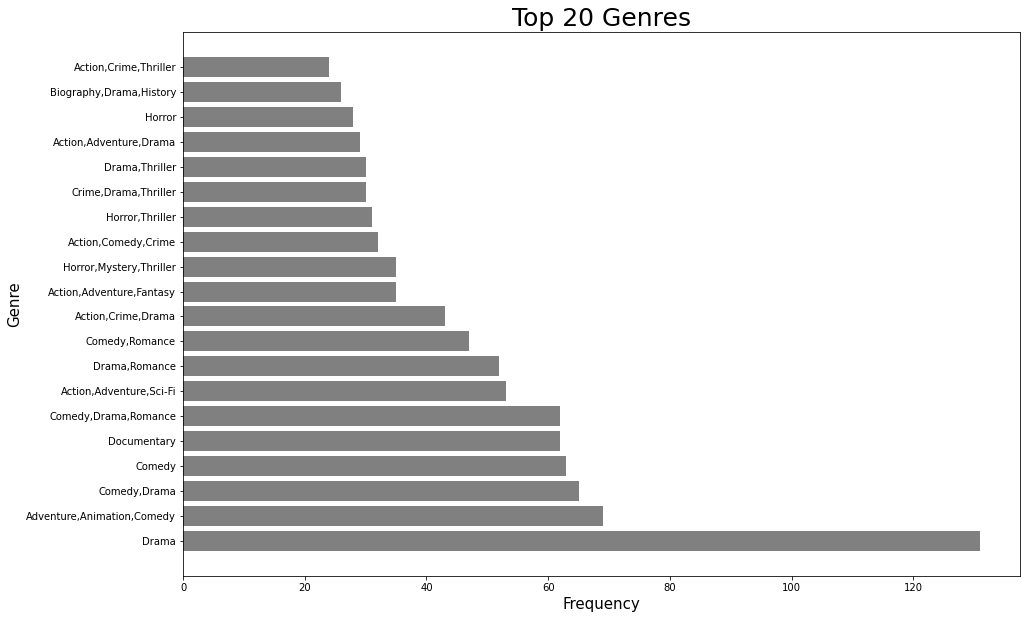

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(top_20_genres.index,top_20_genres, color = 'grey')

ax.set_title('Top 20 Genres', fontsize=25)

ax.set_ylabel('Genre', fontsize=15)
ax.set_xlabel('Frequency', fontsize=15);

In [41]:
top20_genres = top_20_genres.index
individual_genres = pd.Series(top20_genres.str.split(',')).explode().unique()

In [43]:
genre_tables = {}
for genre in top20_genres:
    frame = mega_table[mega_table.genres.str.contains(genre)]
    genre_tables[genre] = frame

In [45]:
horror_table = genre_tables['Horror']
horror_table

,tconst,averagerating,numvotes,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released,Profitable?
70,tt0431021,5.9,53649.0,The Possession,2012,92.0,"Horror,Mystery,Thriller",81.0,"Aug 31, 2012",14000000.0,49130588.0,82925064.0,68925064.0,0.592470,4.923219,2012.0,True
102,tt0455407,6.5,104465.0,The Crazies,2010,101.0,"Horror,Thriller",36.0,"Feb 26, 2010",19000000.0,39123589.0,56445534.0,37445534.0,0.693121,1.970818,2010.0,True
122,tt0464154,5.4,81327.0,Piranha 3D,2010,88.0,"Comedy,Horror",52.0,"Aug 20, 2010",24000000.0,25003155.0,83660160.0,59660160.0,0.298866,2.485840,2010.0,True
177,tt0498381,4.5,34151.0,Rings,2017,102.0,"Drama,Horror,Mystery",38.0,"Feb 3, 2017",25000000.0,27793018.0,82917283.0,57917283.0,0.335190,2.316691,2017.0,True
203,tt0780653,5.8,97873.0,The Wolfman,2010,103.0,"Drama,Fantasy,Horror",91.0,"Feb 12, 2010",150000000.0,62189884.0,142634358.0,-7365642.0,0.436009,-0.049104,2010.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58890,tt7232438,6.1,629.0,The Promise,2017,114.0,"Drama,Horror,Thriller",78.0,"Apr 21, 2017",90000000.0,8224288.0,10551417.0,-79448583.0,0.779449,-0.882762,2017.0,False
60487,tt7598276,8.2,37.0,Phantom,2018,106.0,"Crime,Horror,Thriller",43.0,"Mar 1, 2013",18000000.0,1034589.0,1199510.0,-16800490.0,0.862510,-0.933361,2013.0,False
61203,tt7784604,7.3,151571.0,Hereditary,2018,127.0,"Drama,Horror,Mystery",56.0,"Jun 8, 2018",10000000.0,44069456.0,70133905.0,60133905.0,0.628362,6.013390,2018.0,True
61591,tt7906260,2.6,64.0,Tooth Fairy,2019,86.0,Horror,23.0,"Jan 22, 2010",48000000.0,60022256.0,112610386.0,64610386.0,0.533008,1.346050,2010.0,True


In [48]:
horror_table_narrow = horror_table.loc[horror_table['numvotes'] >= 10000]

In [50]:
horror_table_narrow.describe()

,averagerating,numvotes,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,net_pre_marketing,domestic/world,earnings/cost_ratio,year_released
count,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,162.000000,162.000000,162.000000
mean,5.869753,85252.592593,2013.913580,98.888889,51.987654,1.861679e+07,3.538752e+07,7.915834e+07,6.054155e+07,0.462610,10.484167,2014.074074
std,0.826734,85637.136751,2.664221,11.731467,27.359577,2.913995e+07,4.522432e+07,1.047960e+08,9.196127e+07,0.247859,35.247159,2.605669
min,3.200000,10217.000000,2010.000000,80.000000,1.000000,7.000000e+04,0.000000e+00,7.556000e+03,-1.296538e+07,0.000000,-0.998489,2010.000000
25%,5.300000,33381.750000,2011.250000,91.000000,31.250000,4.000000e+06,3.717054e+06,1.143136e+07,1.591438e+05,0.329152,0.039428,2012.000000
50%,5.900000,57796.000000,2014.000000,97.000000,54.500000,9.450000e+06,2.471731e+07,4.358745e+07,2.906583e+07,0.487986,2.307488,2014.000000
75%,6.400000,106295.750000,2016.000000,105.000000,73.750000,2.000000e+07,4.792146e+07,9.957262e+07,8.502316e+07,0.628645,8.406378,2016.000000
max,7.700000,553751.000000,2019.000000,152.000000,100.000000,1.900000e+08,3.274817e+08,6.974580e+08,6.624580e+08,1.000000,415.564740,2019.000000


In [ ]:
top_genres = mega_table.loc[mega_table['genres'].isin(top20_genres)]
top_genres

In [ ]:
genre_tables = {}
for genre in individual_genres:
    frame = mega_table[mega_table.genres.str.contains(genre)]
    genre_tables[genre] = frame

In [ ]:
#sorting data by month 
mega_table['month_released'] = mega_table['release_date'].str[:3]
mega_table

In [ ]:
#top_genres = mega_table.loc[mega_table['genres'].isin(top20_genres)]
#top_genres

In [ ]:
period_1 = ['Jan', 'Feb', 'Mar', 'Apr']
period_1_df = mega_table.loc[mega_table['month_released'].isin(period_1)]
period_1_df

In [ ]:
#period_2 = ['May', 'Jun', 'Jul', 'Aug']
#period_2_df = mega_table.loc[mega_table['month_released'].isin(period_2)]
#period_2_df

In [ ]:
period_3 = ['Sep', 'Oct', 'Nov', 'Dec']
period_3_df = mega_table.loc[mega_table['month_released'].isin(period_3)]
period_3_df

In [ ]:
period_3_df = period_3_df.loc[period_3_df['numvotes'] >= 10000]
period_3_df

In [ ]:
#period_2_df = period_2_df.loc[period_2_df['numvotes'] >= 10000]
#period_2_df

In [ ]:
#Period 1 data 
period_1_df.describe()

In [ ]:
period_1_sorted=period_1_df.value_counts('genres').head(20)
period_1_genres=period_1_sorted.index
period_1 = period_1_df.loc[period_1_df['genres'].isin(period_1_genres)]
period_1

# Period 1 Data

#### Earnings Per Cost Ratio

In [ ]:
period_1['ec_ratio'] = period_1['earnings/cost_ratio']

In [ ]:
genre_dict2=dict(period_1.groupby('genres').ec_ratio.mean())
sort_genre_mean2 = sorted(genre_dict2.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted2=dict(sort_genre_mean2)
genre_mean_sorted2
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted2.keys(),genre_mean_sorted2.values())
plt.xticks(rotation=90)
plt.title('Average Earning Per Cost Ratio', fontsize = 30);

### World Wide Gross Income
The world wide gross income of the top 20 genres of the period 

In [ ]:
genre_dict3=dict(period_1.groupby('genres').worldwide_gross.mean())
sort_genre_mean3 = sorted(genre_dict3.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted3=dict(sort_genre_mean3)
genre_mean_sorted3
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted3.keys(),genre_mean_sorted3.values())
plt.xticks(rotation=90)
plt.title('Average World Wide Gross Income', fontsize = 30);

## Net Profit 
Net profit before the cost of marketing of the top 20 genres in period 1

In [ ]:
genre_dict4=dict(period_1.groupby('genres').net_pre_marketing.mean())
sort_genre_mean4 = sorted(genre_dict4.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted4=dict(sort_genre_mean4)
genre_mean_sorted4
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted4.keys(),genre_mean_sorted4.values())
plt.xticks(rotation=90)
plt.title('Average Net Profit Before Marketing Costs', fontsize = 30);

# Period 3 Data 

## Earnings Per Cost Ratio

In [ ]:
period_3_sorted=period_3_df.value_counts('genres').head(20)
period_3_genres=period_3_sorted.index
period_3 = period_3_df.loc[period_3_df['genres'].isin(period_3_genres)]
period_3

In [ ]:
period_3['ec_ratio'] = period_3['earnings/cost_ratio']

In [ ]:
genre_dict5=dict(period_3.groupby('genres').ec_ratio.mean())
sort_genre_mean5 = sorted(genre_dict5.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted5=dict(sort_genre_mean2)
genre_mean_sorted5
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted5.keys(),genre_mean_sorted5.values())
plt.xticks(rotation=90)
plt.title('Average Earning Per Cost Ratio', fontsize = 30);

## World Wide Gross Income 

In [ ]:
genre_dict6=dict(period_3.groupby('genres').worldwide_gross.mean())
sort_genre_mean6 = sorted(genre_dict6.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted6=dict(sort_genre_mean6)
genre_mean_sorted6
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted6.keys(),genre_mean_sorted6.values())
plt.xticks(rotation=90)
plt.title('Average World Wide Gross Income', fontsize = 30);

## Net Profit 

In [ ]:
genre_dict7=dict(period_3.groupby('genres').production_budget.mean())
sort_genre_mean7 = sorted(genre_dict7.items(), key=lambda x: x[1], reverse=True)
genre_mean_sorted7=dict(sort_genre_mean7)
genre_mean_sorted7
fig,ax= plt.subplots(figsize=(20, 10))
ax.bar(genre_mean_sorted7.keys(),genre_mean_sorted7.values())
plt.xticks(rotation=90)
plt.title('Average Budget ', fontsize = 30);